# 0412 TA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Boston House Prices LinearRegression

In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
x_data = boston.data

In [6]:
y_data = boston.target

In [7]:
x_data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [8]:
y_data[0]

24.0

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
# 分離資料

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.3,random_state = 100)

In [13]:
# 開線性回歸

regr = LinearRegression()

In [14]:
# 訓練

regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
regr.intercept_

33.13276132414593

In [16]:
regr.coef_

array([-7.55279583e-02,  3.94988772e-02, -5.66632384e-03,  2.63306987e+00,
       -1.31645891e+01,  3.84047691e+00, -1.20170638e-02, -1.37605105e+00,
        2.83294482e-01, -1.40619865e-02, -9.19238942e-01,  1.06668898e-02,
       -4.38754506e-01])

### statsmodels

In [17]:
import statsmodels.api as sm

In [18]:
model = sm.OLS(y_train, x_train)

In [19]:
result = model.fit()

In [20]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     708.1
Date:                Fri, 12 Apr 2019   Prob (F-statistic):          1.12e-237
Time:                        11:34:01   Log-Likelihood:                -1041.2
No. Observations:                 354   AIC:                             2108.
Df Residuals:                     341   BIC:                             2159.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0524      0.044     -1.184      0.2

# 機器學習

* supervised learning（監督式學習）
* unsupervised learning （非監督式學習）

supervised learning 的話我們會將已知的答案送進去電腦, 讓電腦學習想要的函數。

而 unsupervised learning 就是讓電腦去自我學習，產生電腦認為的結果

supervised learning會介紹的是SVM, unsupervised learning則介紹K-Means。

### SVM

In [22]:
from sklearn.svm import SVC

In [23]:
x = np.array([[-3, 1], [-6, 7], [3, -2], [5, -8]])

In [24]:
y = np.array([1, 1, 2, 2])

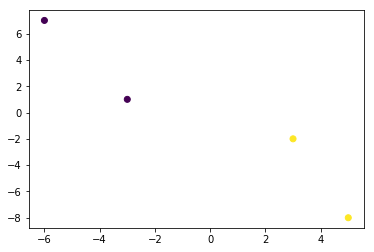

In [25]:
plt.scatter(x[:, 0], x[:, 1], c = y)

In [26]:
clf = SVC()

In [27]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
clf.predict([[2.5, 3]])

array([2])

In [29]:
xx = [1, 2, 3, 4]
yy = [5, 6, 7, 8]

In [30]:
X, Y = np.meshgrid(xx, yy)

In [31]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [32]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [33]:
X1 = X.ravel()
X1

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [34]:
Y1 = Y.ravel()
Y1

array([5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8])

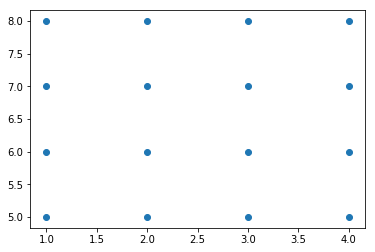

In [35]:
plt.scatter(X1, Y1)

In [36]:
X, Y = np.meshgrid(np.linspace(-6, 5, 30), np.linspace(-8, 7, 30))

In [37]:
X1 = X.ravel()
Y1 = Y.ravel()

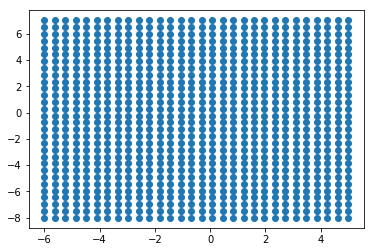

In [38]:
plt.scatter(X1, Y1)

In [39]:
Z = clf.predict(np.c_[X1, Y1])

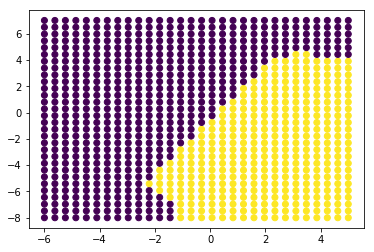

In [40]:
plt.scatter(X1, Y1, c = Z)

In [41]:
from sklearn.datasets import load_iris

In [42]:
iris = load_iris()

In [43]:
X = iris.data

In [44]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [45]:
Y = iris.target

In [46]:
Y[0]

0

In [47]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
x_data = X[:, 1:3]

In [49]:
x_data[0]

array([3.5, 1.4])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_data, Y,
                                                   test_size = 0.2,
                                                   random_state = 87)

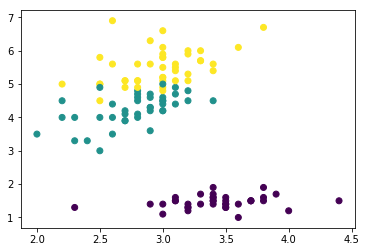

In [51]:
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)

In [52]:
clf = SVC()

In [53]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
y_predict = clf.predict(x_test)

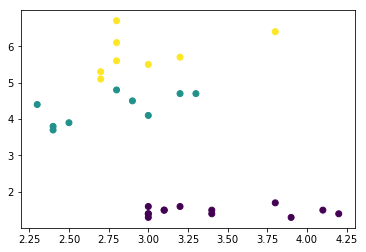

In [55]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_predict)

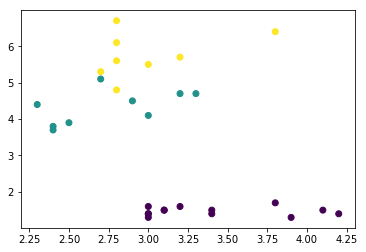

In [56]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test, y_predict)

0.9333333333333333

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test, y_predict)

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  7]])

In [61]:
X, Y = np.meshgrid(np.arange(1, 5, 0.2), np.arange(0, 8, 0.2))

In [62]:
X1 = X.ravel()
Y1 = Y.ravel()

In [63]:
Z = clf.predict(np.c_[X1, Y1])

In [64]:
Z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

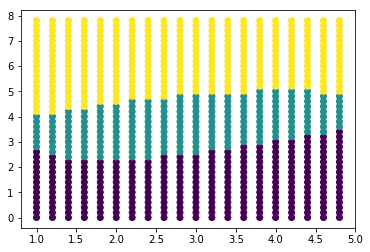

In [65]:
plt.scatter(X1, Y1, c = Z)

In [66]:
Z1 = Z.reshape(X.shape)

In [67]:
Z[0]

0

In [68]:
Z1[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
Z.shape

(800,)

In [70]:
Z1.shape

(40, 20)

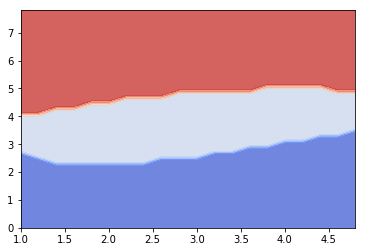

In [71]:
plt.contourf(X, Y, Z1, cmap = 'coolwarm', alpha = 0.8)

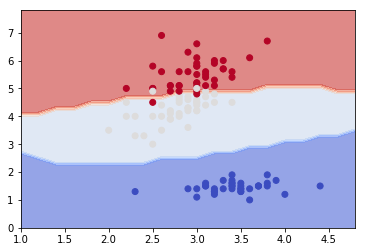

In [74]:
plt.contourf(X, Y, Z1, cmap = 'coolwarm', alpha = 0.6)
plt.scatter(x_train[:,0], x_train[:,1], c = y_train, cmap = 'coolwarm')

### K-Mean

In [75]:
from sklearn.cluster import KMeans

In [76]:
clf3 = KMeans(n_clusters=3)

In [77]:
clf3.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
clf3.labels_

array([0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2,
       1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1,
       0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 2,
       0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       1, 2, 2, 0, 2, 2, 1, 0, 1, 1], dtype=int32)

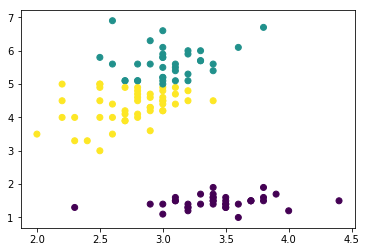

In [79]:
plt.scatter(x_train[:, 0], x_train[:, 1], c = clf3.labels_)

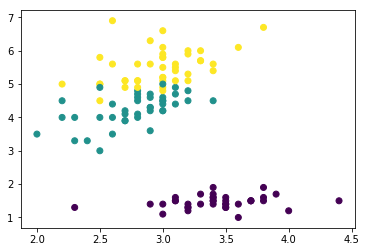

In [80]:
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)

In [82]:
y_predict = clf3.predict(x_test)

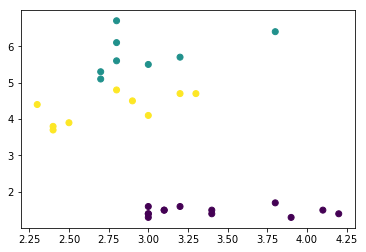

In [83]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_predict)